# Cross Validation

> This notebook will provide some info about cross validation and its different technics along with pictorial and code explanation

- toc: true 
- badges: true
- comments: false
- categories: [data_analytics, EDA, DTale]
- image: images/CV.png

**If we have 1000 data points in our whole dataset we generally split that into 70-30% or 75-25% (70% train-30% test)**<br><br>

**Now we set a variable called Random state to any integer value(popular values are 42,0). For each such random state dataset is randomly split into train and test.**<br><br>

**So suppose, if we get 85% accuracy on test data for Random_state=0, then we may get 87% test accuracy for Random_state=42**<br><br>


<h3>Types of Cross Validation-</h3><br><br>


**1. LOO-Leave One Out Cross Validation-**
<br>
This cross validation method is very old. As the name suggests, if there are a total 1000 data points then only the 1st single data point is taken as a test data and the rest 999 are used for training the model.

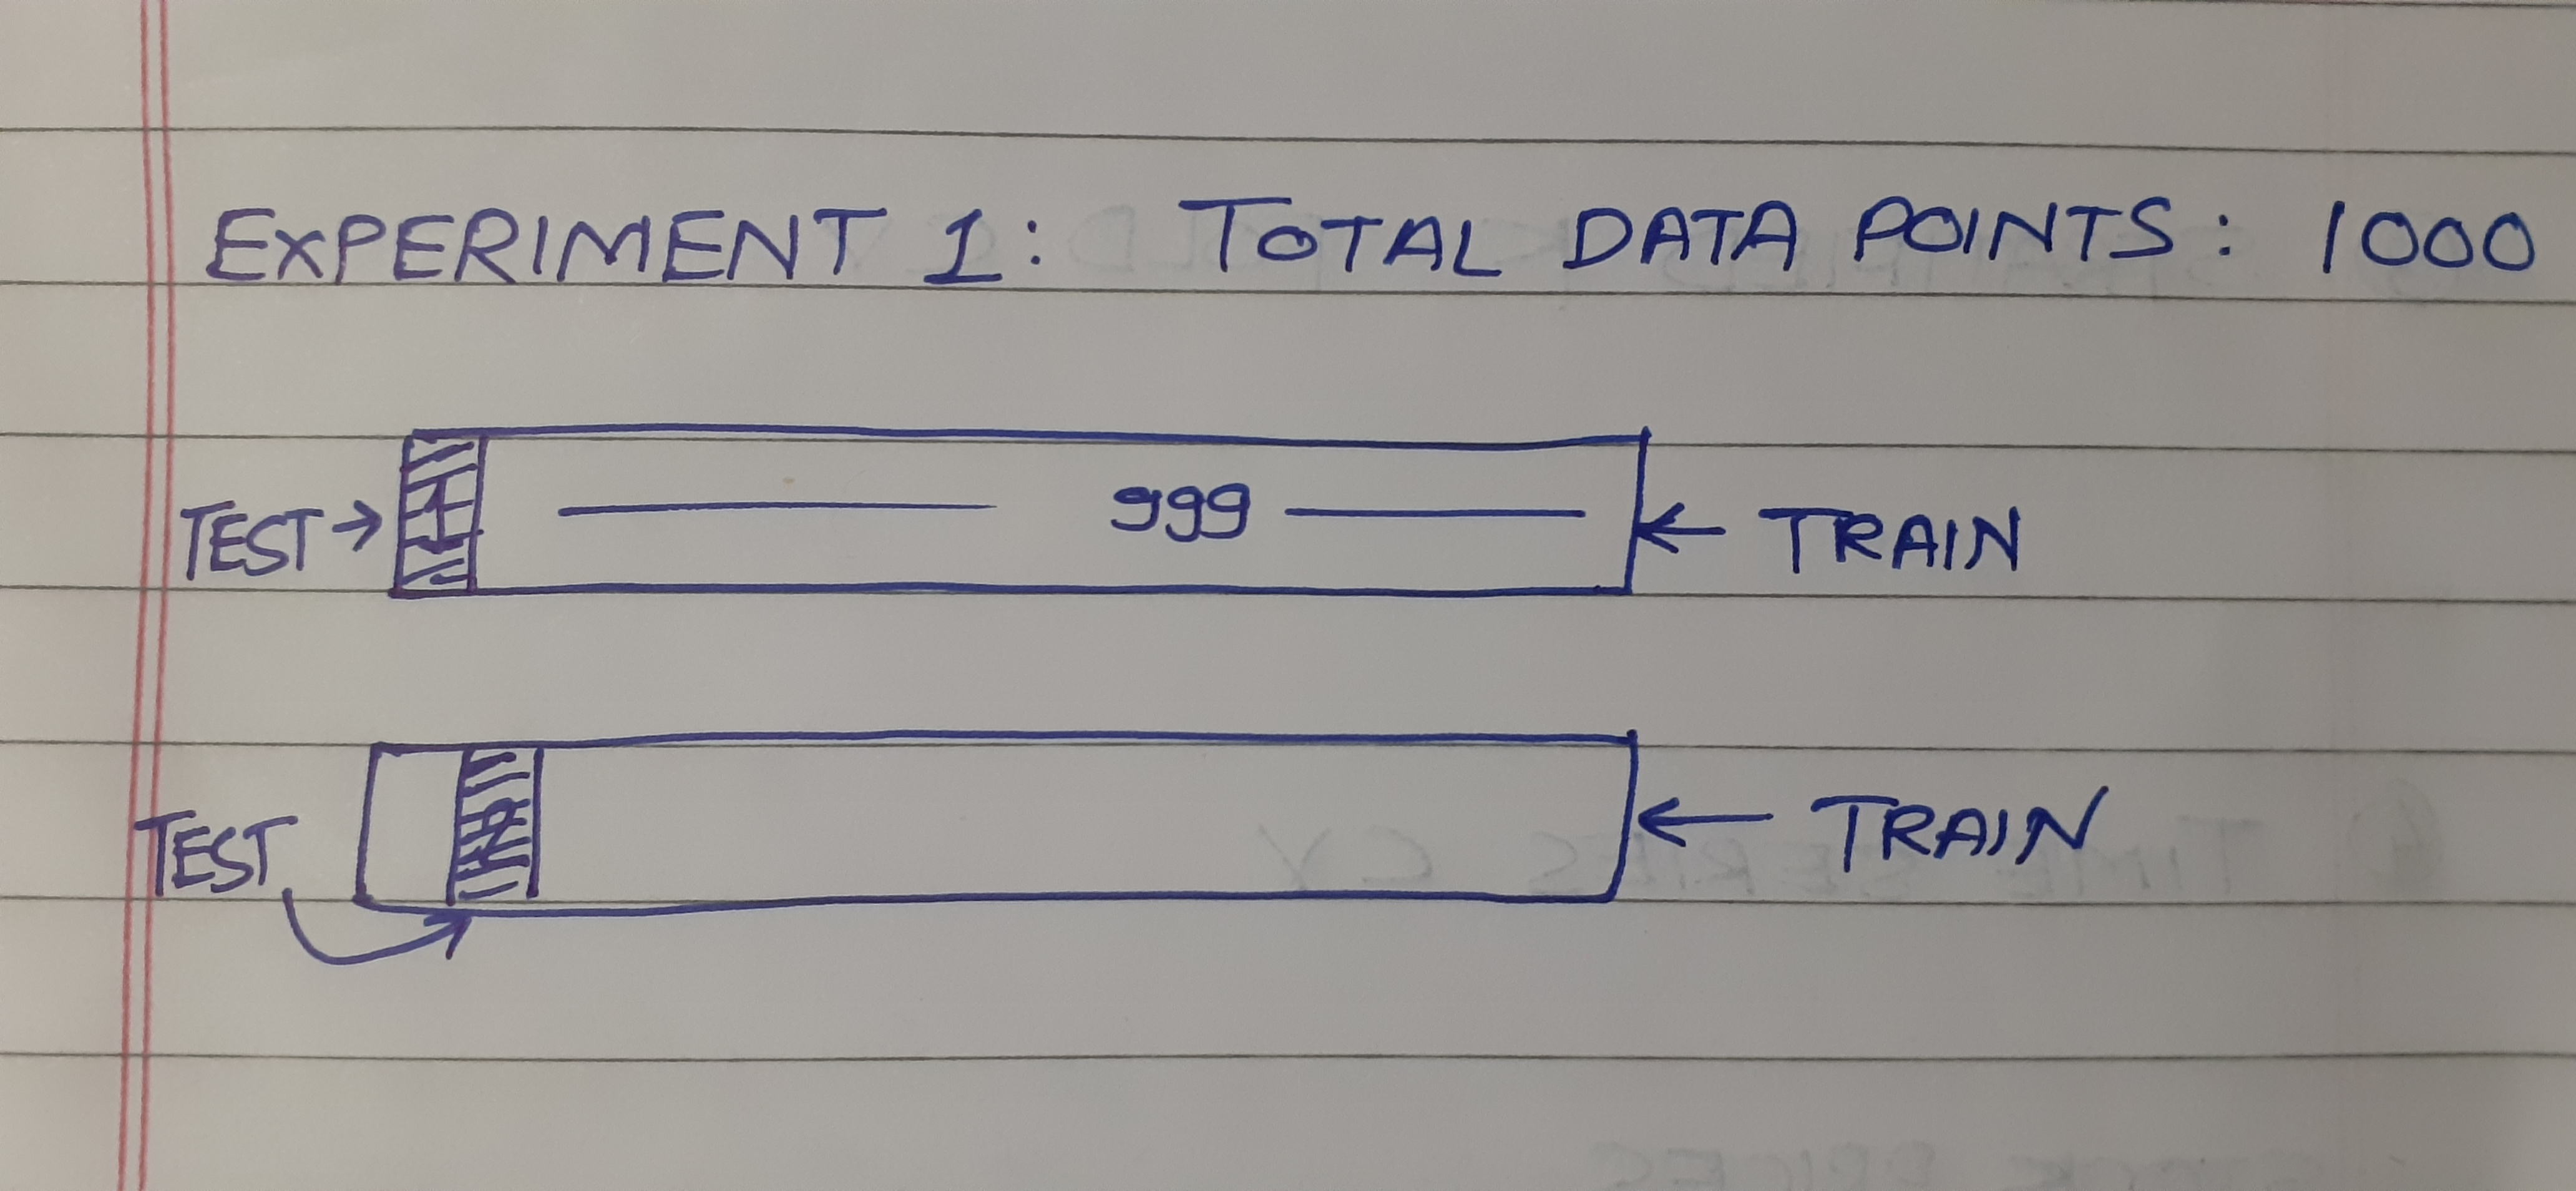

In [ ]:
from IPython.display import Image
Image(filename='/content/20210718_220005.jpg')

Obvious disadvantages-

1. A lot of computation power require

2. As there is only single test data point Bias is very Low

**2. K-Fold Cross Validation-**

In K-Fold CV, we consider some small value of K lets say K=5. So now if we have a dataset containing a total 1000 data points we will perform 5 experiments where 1000/5=200, 200 data points randomly get selected as test data for each experiment.

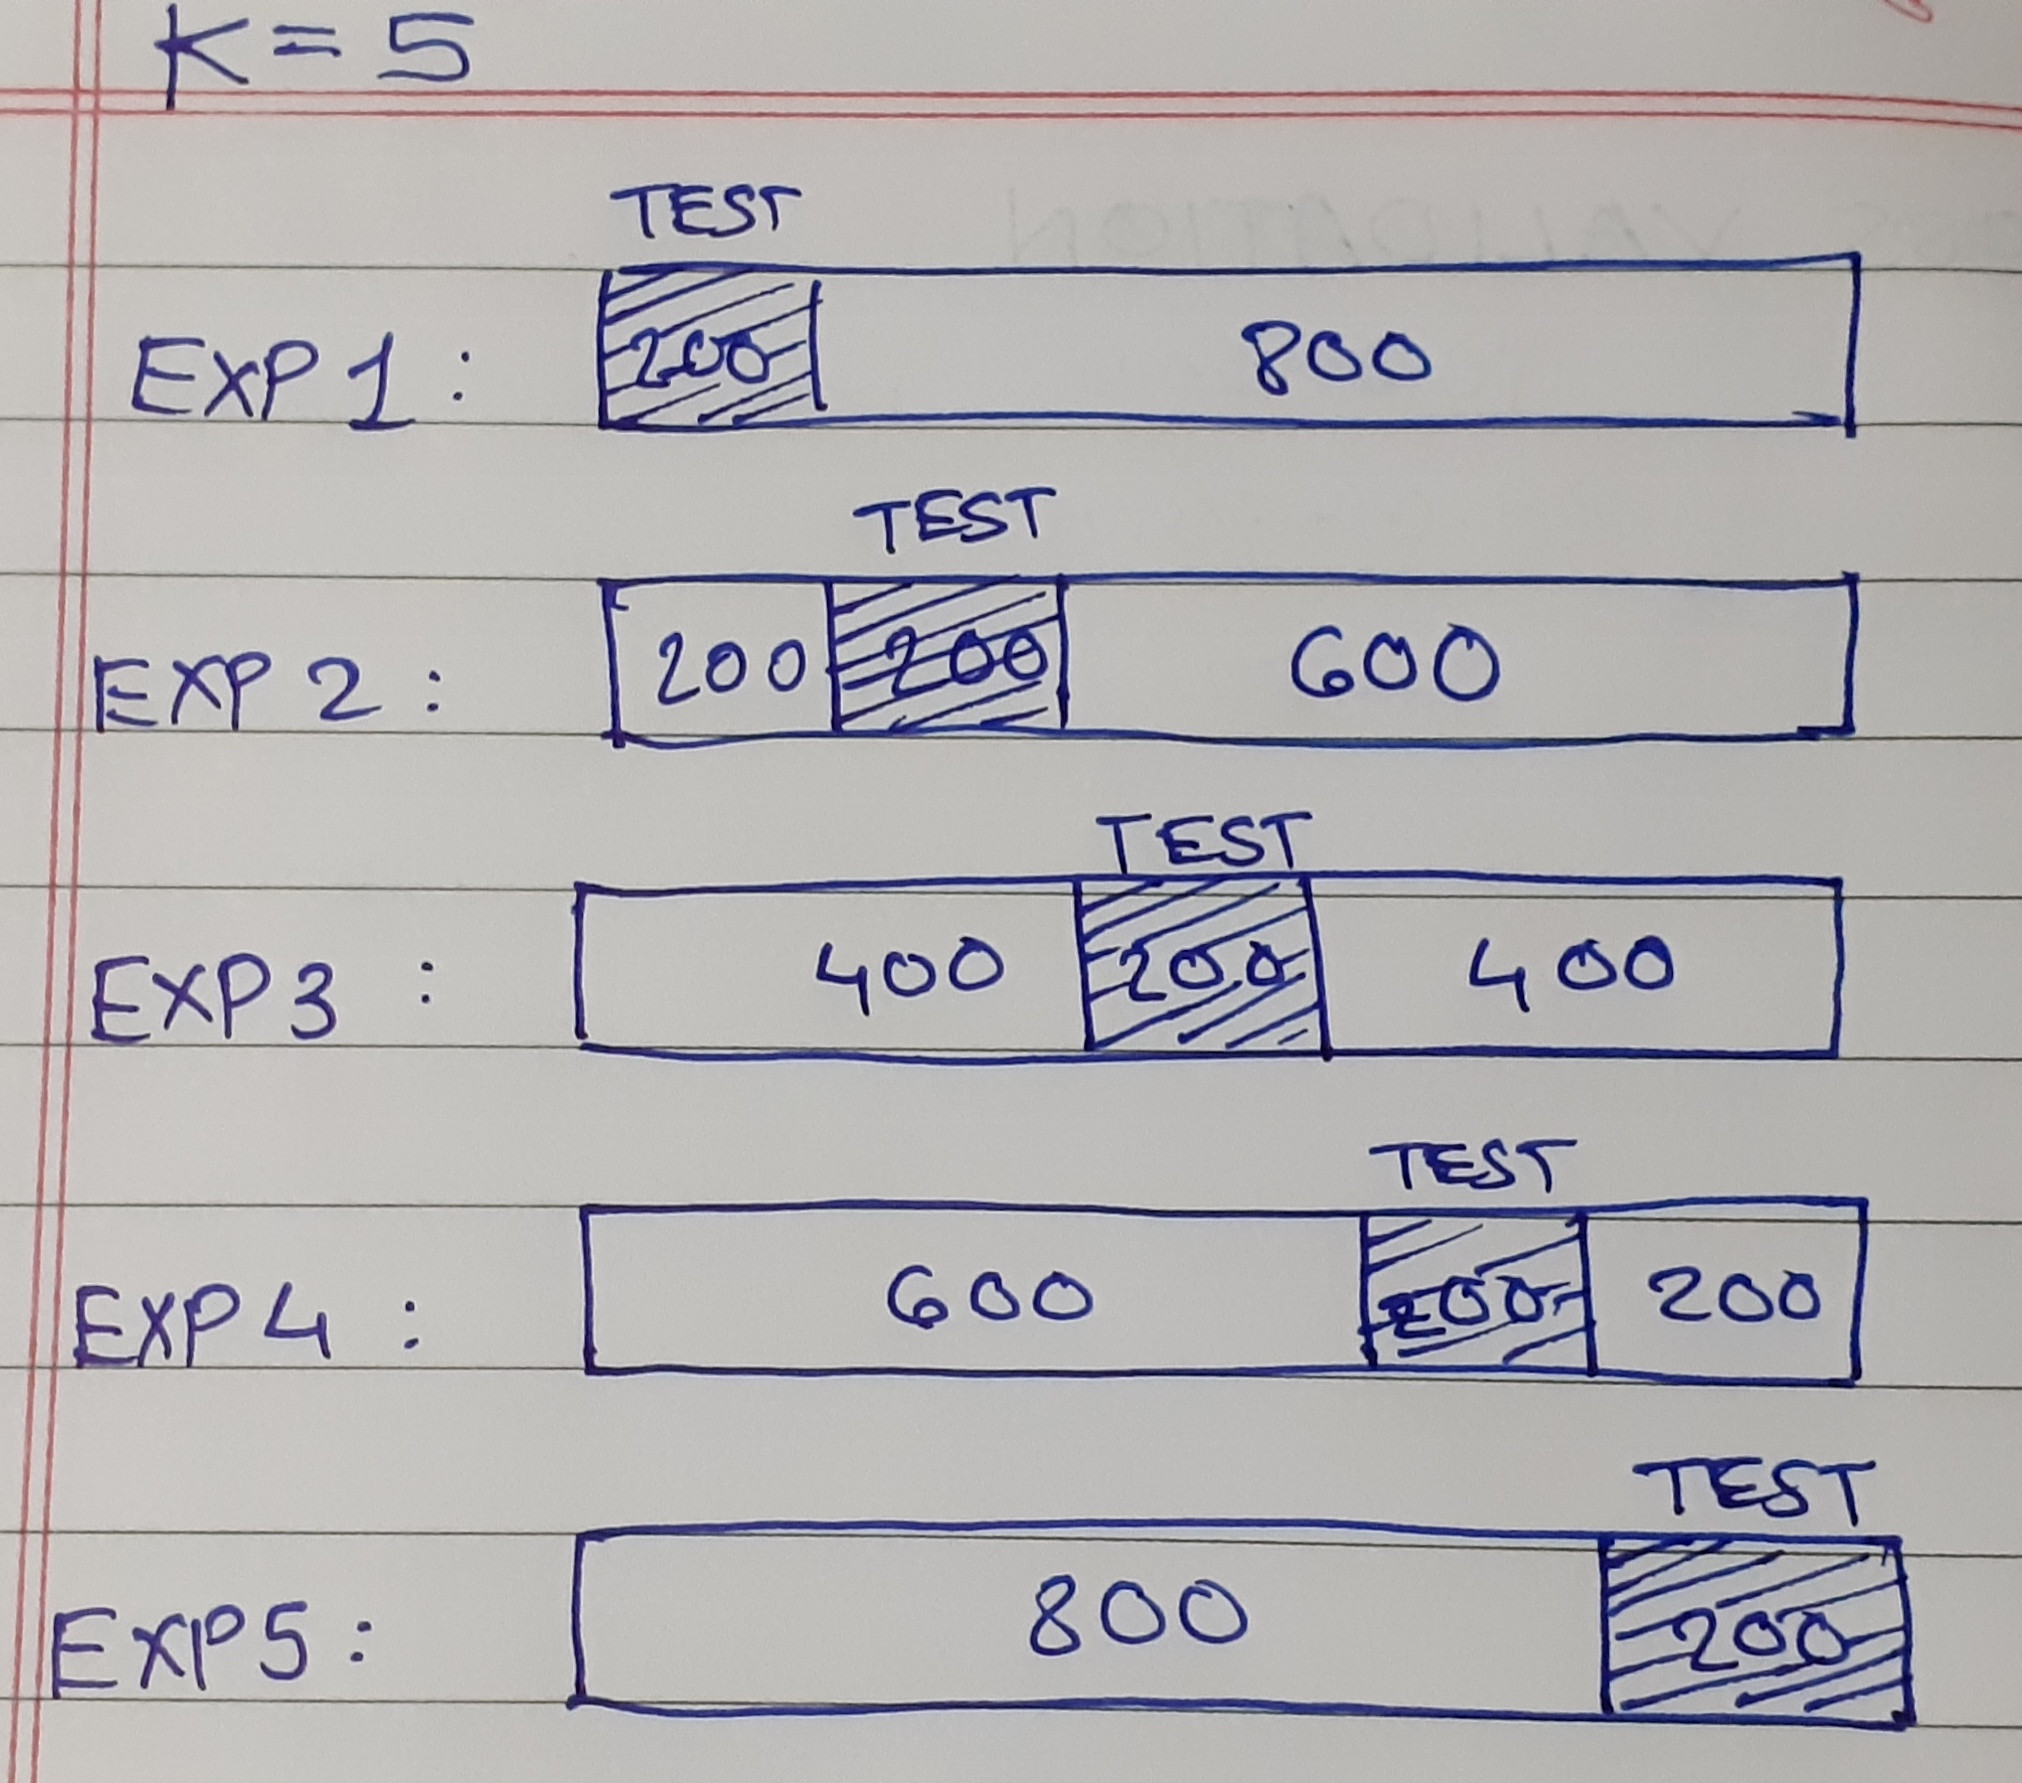

In [ ]:
from IPython.display import Image
Image(filename='/content/20210718_220052.jpg')

**Advantages-**

It overcomes Low Bias issue of first method<br><br>

**Disadvantages-**

If there is a Binary Classification problem of 1’s and 0’s so I can get my test data for some experiment containing only 1’s or maximum 0’s or 1’s in my training data. This will result in Low Bias and bad performance of model<br><br>



**3. Stratified K-Fold Cross Validation-**

This is probably the most used CV method now. This is similar to normal K-Fold CV but it overcomes the issue in the above method. In this, the algorithm makes sure that the number of instances of each class gets split into train and test data in a proper ratio.

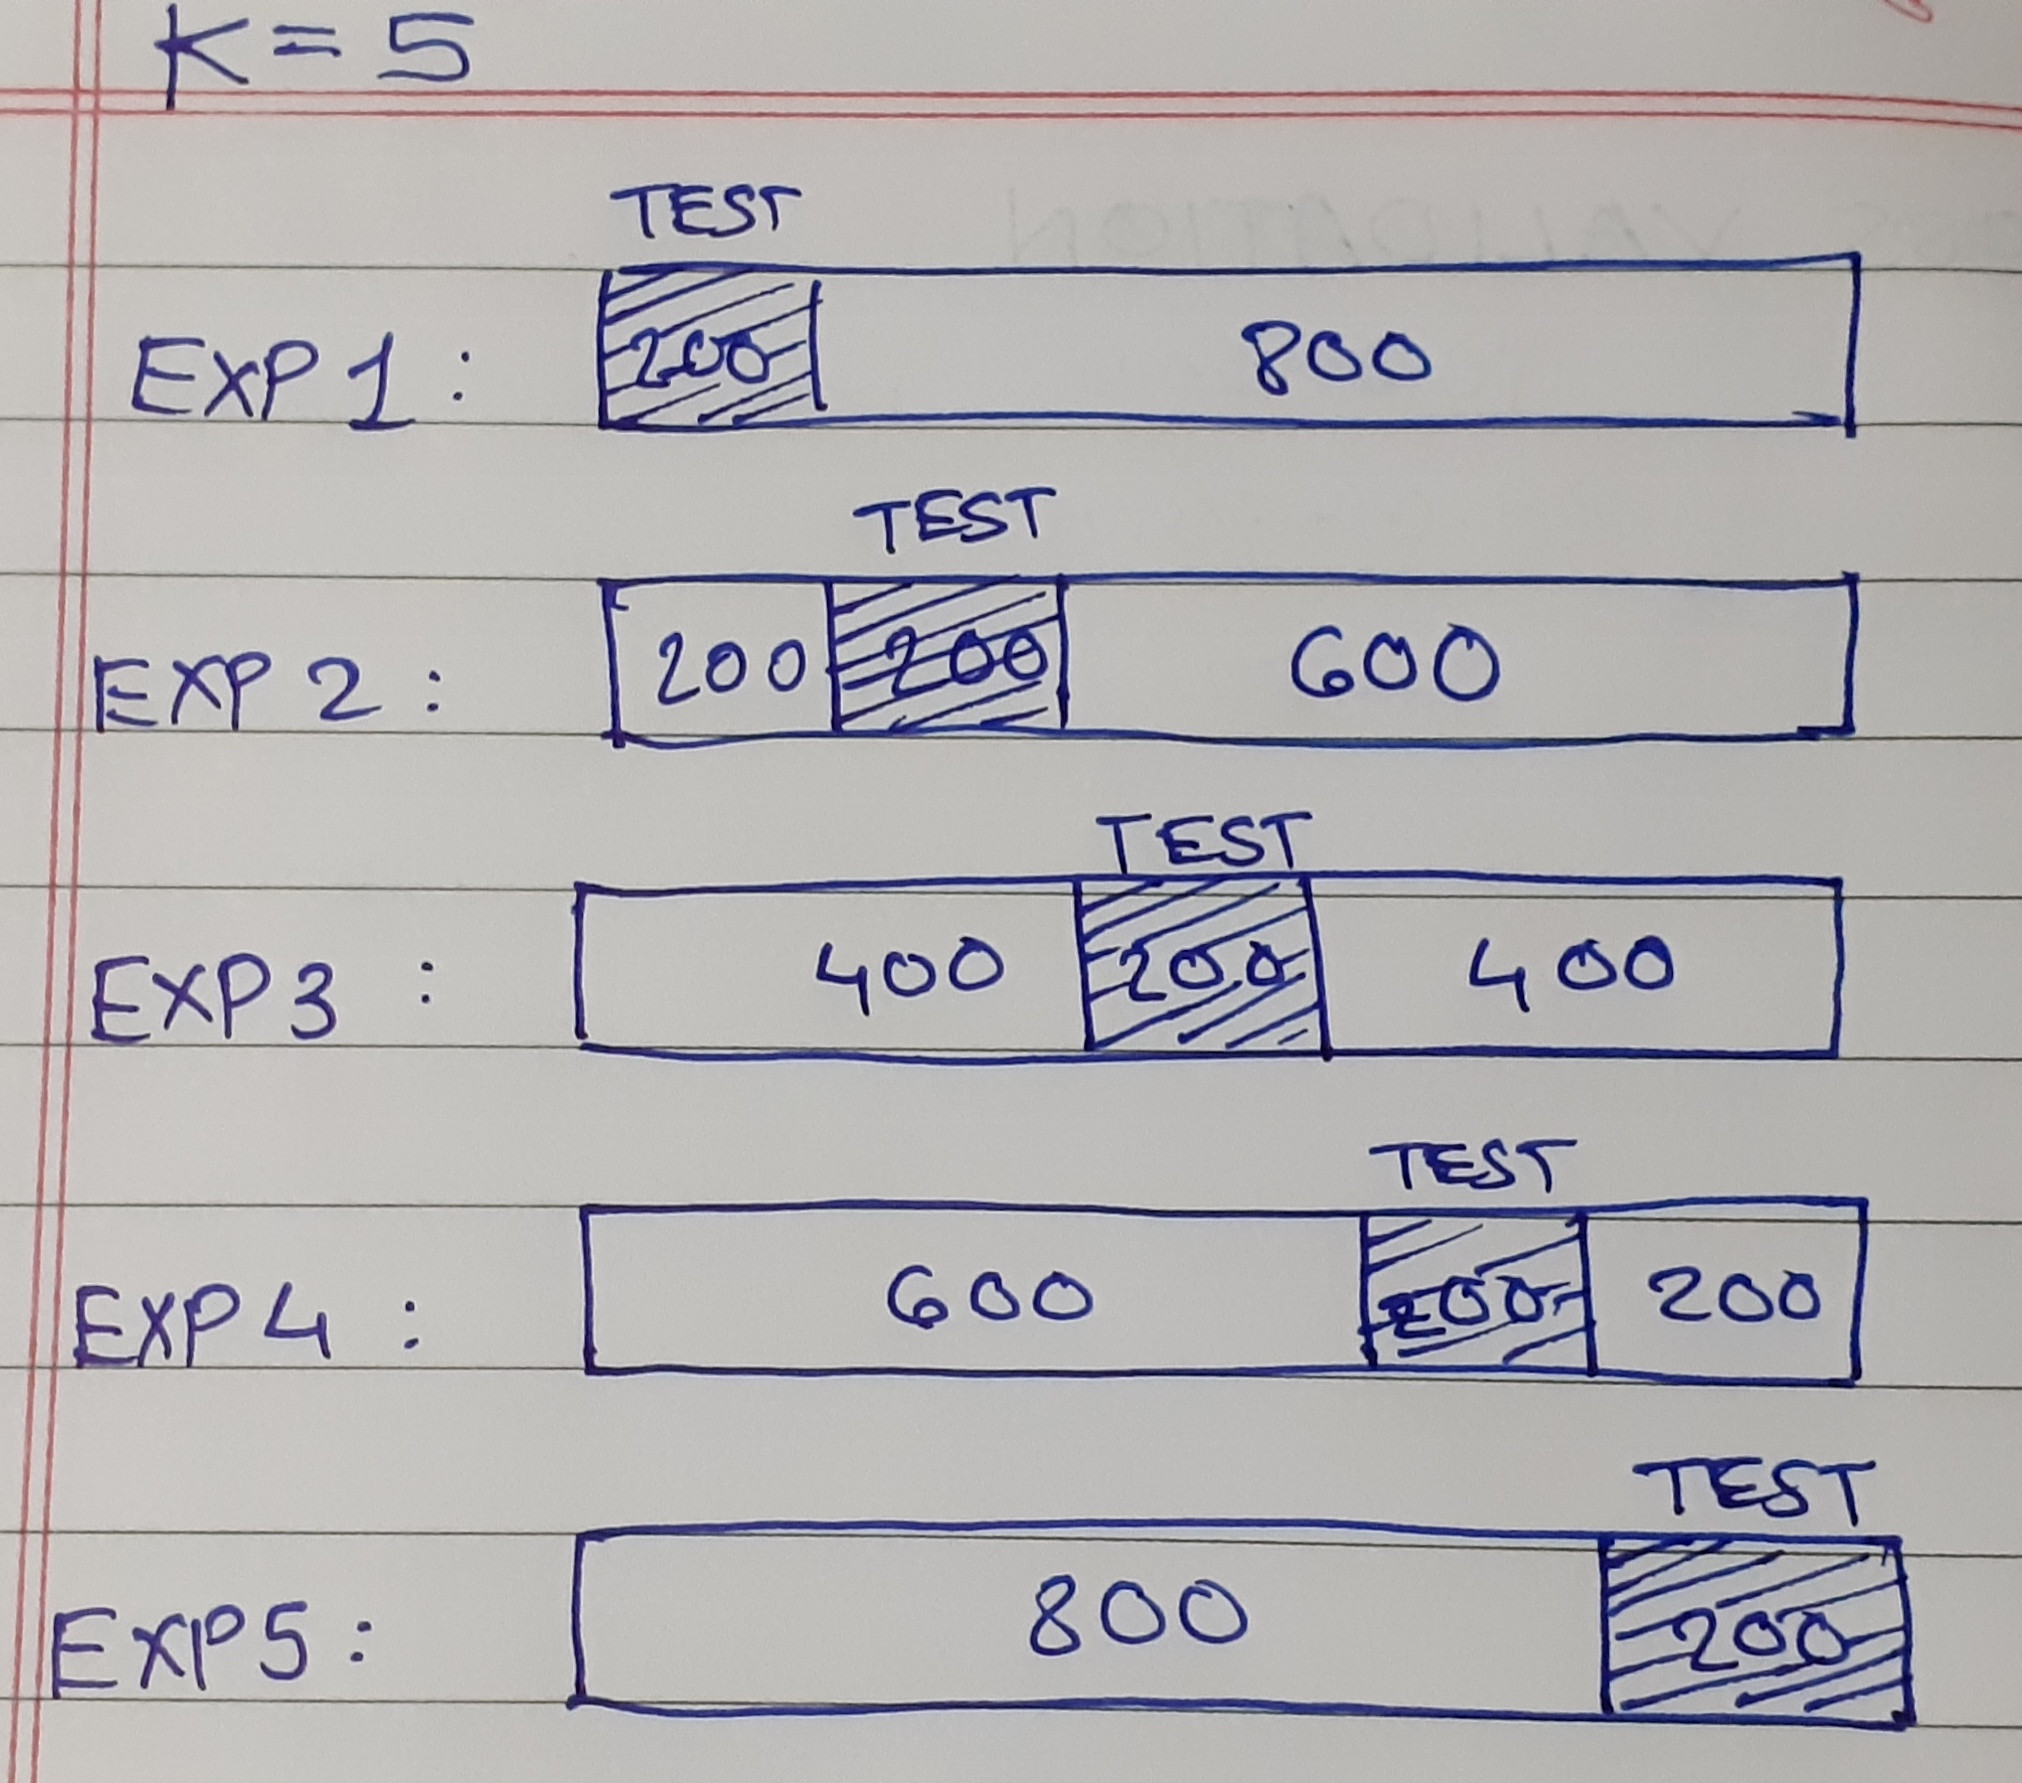

In [ ]:
from IPython.display import Image
Image(filename='/content/20210718_220052.jpg')

Advantages-

Overcomes the Low Bias problem of K-Fold CV





**4. Time Series Cross Validation-**

This method is used for Time Series problems as you just CAN NOT use the above method for TS data as random splitting is useless. So we cross validate something like this-

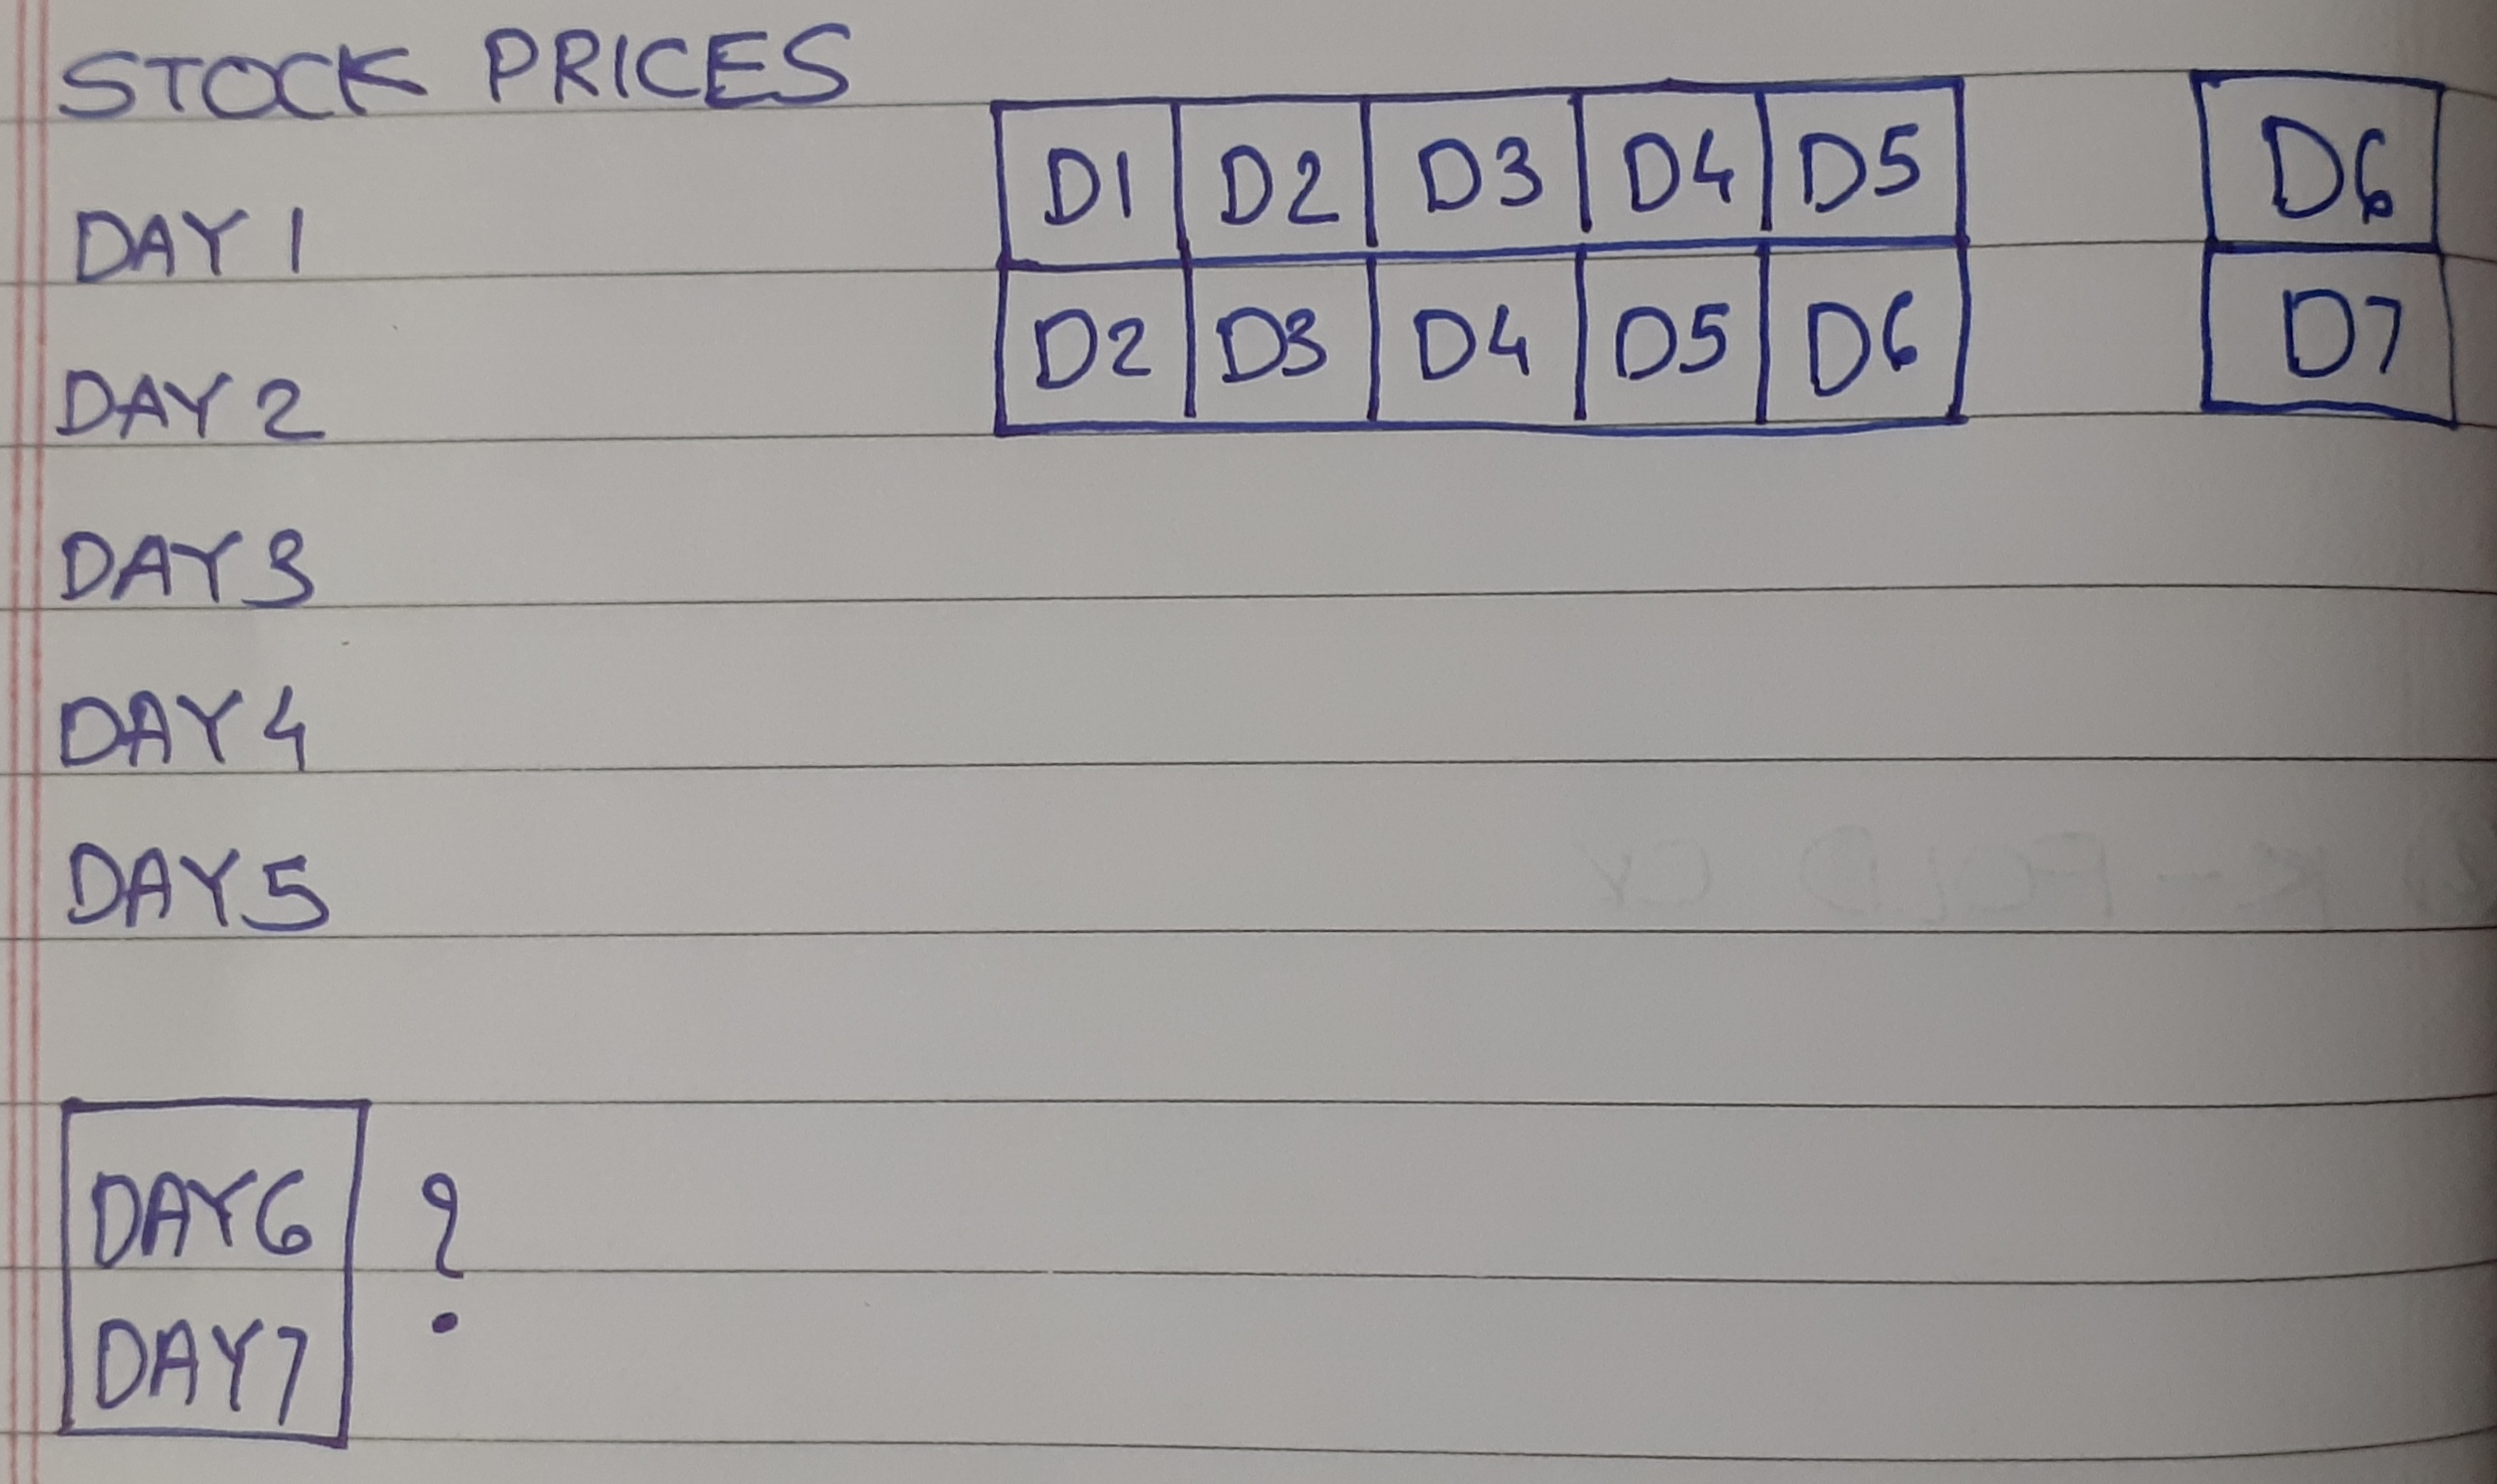

In [ ]:
from IPython.display import Image
Image(filename='/content/20210718_220111.jpg')

<h3>Now we will see how these Cross Validation technics can be implemented</h3>

In [ ]:
# dataset: https://github.com/chinya07/Datasets-used-in-my-blogs/blob/07920cb11dc86ddda52a5d7bf29730ca5961f950/cancer_dataset.csv
import pandas as pd
df=pd.read_csv('cancer_dataset.csv')
df.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [ ]:
###  Independent And dependent features
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [ ]:
X.head()

radius_mean  texture_mean  ...  fractal_dimension_worst  Unnamed: 32
0        17.99         10.38  ...                  0.11890          NaN
1        20.57         17.77  ...                  0.08902          NaN
2        19.69         21.25  ...                  0.08758          NaN
3        11.42         20.38  ...                  0.17300          NaN
4        20.29         14.34  ...                  0.07678          NaN

[5 rows x 31 columns]

In [ ]:
X=X.dropna(axis=1)

In [ ]:
X.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

In [ ]:
# Checking whether our dataset is balanced or not
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### HoldOut Validation Approach- Train And Test Split

In [ ]:
#HoldOut 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
model = DecisionTreeClassifier()    #You can add your own parameters here
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9005847953216374


### K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.87719298 0.9122807  0.85964912 0.94736842 0.94736842 0.98245614
 0.9122807  0.92982456 0.96491228 0.96428571]
0.9297619047619048


### Stratified K-fold Cross Validation

In [ ]:
# Good for imbalanced data

from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.9173730787144851


In [ ]:
scores

array([0.9122807 , 0.9122807 , 0.9122807 , 0.94736842, 0.90265487])

### Leave One Out Cross Validation(LOOCV)

In [ ]:
from sklearn.model_selection import LeaveOneOut
model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)

In [ ]:
results

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
print(np.mean(results))

0.929701230228471


There is a **Leave p out Cross Validation** technique too.<br>
In this technique only difference is instead of 1 data point we specify p elements which will be used as test data.

### Repeated Random Test-Train Splits
This technique is a hybrid of traditional train-test splitting and the k-fold cross-validation method. In this technique, we create random splits of the data in the training-test set manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

In [ ]:
from sklearn.model_selection import ShuffleSplit
model=DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)

In [ ]:
results

array([0.95321637, 0.94152047, 0.92397661, 0.90643275, 0.90643275,
       0.94152047, 0.91812865, 0.94152047, 0.88304094, 0.93567251])

In [ ]:
np.mean(results)

0.9251461988304094